<h2>Data</h2>

The data requirements, sources, collection, and cleaning will be discussed in the following section. 

### Requirements

A variety of data is required to address the business problem.  This will include the following;
-	A list of Canadian brewers with their geolocation and venue information
-	A list of venues within walking distance of these locations and their characteristics such as venue category
-	The number and distance between breweries within regions from which they can expect to draw onsite customers
-	Demographic information for regions from which they can expect to draw onsite customers 
-	Performance metrics for breweries such as number of stars, likes, ratings, and longevity


### Sources
No one source of data can meet the requirements outlined above.  While this work will draw heavily on the Foursquare several other sources will be exploited including the website RateBeer.com and Statistics Canada open data. 

##### Foursquare
Foursquare is a “search-and-discover mobile app” built on a crowd sourced database of location data.  The database information can be accessed through a developer API.  The latitude and longitude of venues is linked to various characteristics and user reported ratings.  The API will provide the record for a specific venue or collect and provide the data of various venues within a specified distance of a point of interest.

##### Rate Beer
The initial exploration of foursquare breweries and brewpub data indicated that users had labelled several venues as meeting these categories when, in fact, the businesses did not actually brew their own beer.  To address this deficiency a comprehensive list on the website ratebeer.com was scraped to obtain a more accurate listing of Canadian brewers. 

##### Statistics Canada Census Data
Statistics Canada gathers and provides open datasets of Canadian census data.  The latest census available is from 2016 and this demographic data is made available for various geographic areas.  One of these regional subsets is Forward Sortation Areas (FSA).  These FSA are defined by the first three characters of Canadian postal codes. The census data for these areas is accessed though Statistics Canada’s Web Data Service for which a resource URL is specified and a JSON response can be obtained.

##### Statistics Canada Geo Data
To visualize the FSA geodata is required describing their boundaries.  These boundaries are available through Statistics Canada and in this instance were downloaded from the Statistics Canada website as a shapefile suitable for plotting using various Python libraries.


### Collection and cleaning
The collection and cleaning of the required data is described below.

##### FSA boundaries
The boundaries of the FSA have been obtained as shape files from Statistics Canada Geo Data through their open data portal. In addition to the geometry(‘geometry’) each region includes the FSA identifier (‘CFUSID’) and the name of the province it is associated with (‘PRNAME’).  The boundaries cover the entire country and are plotted below as a shape file using Python.  Note the coordinate reference frame is based in meters (EPSG:3347) rather than degrees (EPSG:4326) such as used by folium.  This is easily changed using Python libraries depending on the required operations.  Care must be taken to track the current reference frame while using the data. No cleaning was required for this dataset.

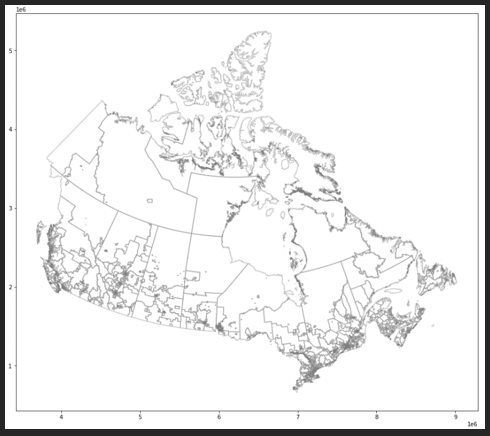

##### List of Canadian breweries
The list of Canadian breweries was scraped from Ratebeer.com using beautiful soup.  The resulting dataset included the establishment name(‘name’), type(’type’), community(‘community’), the date established(‘established’), and the number of beers that had been rated for the business(‘brews’).  The brewery ‘type’ variable was used to filter the results to microbreweries and brewpubs removing large commercial brewers and others business types not relevant to this work.  The resulting dataset included 1125 breweries which is consistent with literature from Beer Canada [1].   Two minor spelling errors were identified in reviewing the data and were corrected.  The date the brewery was established was used to determine the current years in operation for each venue (‘years_operating’)

##### Foursquare data for Canadian breweries
The Foursquare API was then used to search for venue information on the list of Canadian breweries gathered above.  From the 1125 breweries on the list data was returned for 1064 venues.  An examination of the establishments that were not found revealed that many were permanently closed, were chains with no community address, did not have data in Foursquare, or had no user information in Foursquare.  For the purposes of this work only the venues with entries in Foursquare were considered.  The features of the venue data are summarized with their variable name in the table below.

|Variable|Description|
|:---|:---|
|fs_id|The foursquare ID for the venue|
|fs_name|The name listed in foursquare|
|fs_lat|The locations latitude|
|fs_lng|The locations longitude|
|fs_postalcode|The postal code of the venue|
|fs_city|The venues’ city or town|
|fs_province|The venues’ province|

From the venues found in Foursquare a number of duplicate entries were identified which were dropped resulting in 977 records.  Finally, a review of the brewery location using ‘fs_province’ identified a few odd US breweries had been included from California, Vermont, New York, Michigan, and Washington state. These venues were also dropped from the dataset with 972 records remaining.
Recall the FSA were defined by the first three characters of the postal code.  From the 972 records 145 were found to have incomplete, invalid, or no entry for their postal code. Where available the FSA (‘FSA’) was collected from the postal code.  To address the remaining records a shapely point was defined from the latitude and longitude provided by foursquare for the venues.  The shapefile geometries for each of the FSA were then cycled through for each point to determine its associated FSA. 
From this dataset every brewery under consideration has been plotted using shapely and as an interactive folium map with clustering labels. The red points in the plot on the left below are each brewery and a snapshot of the dynamic folium map is shown on the right.

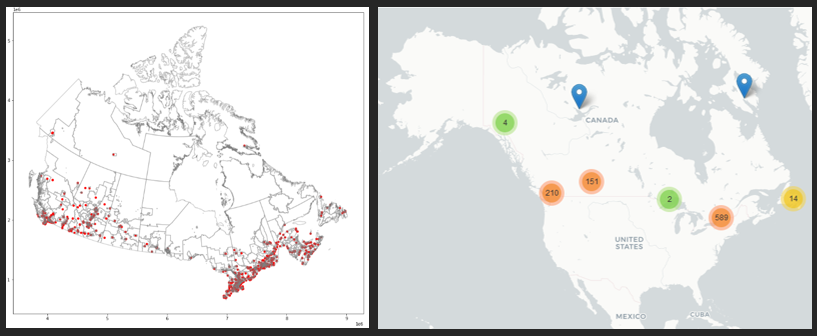

##### Foursquare data for venues within walking distance of Canadian breweries
The Foursquare API was then used to search for information on venues in the neighbourhood surrounding Canadian breweries.  The data from up to 50 venues were gathered around each brewery.  Walking distance is typically considered to be 400 to 500 meters [5].  Based on this definition, venues within 500 meters of each brewery were characterized.  This identified 12362 venues associated with the 972 breweries. The data gathered includes the Venue name (‘Venue’), latitude (‘Venue Latitude’), longitude (‘Venue Longitude’), and category (‘Venue Category’).  In 81 instances there were no surrounding venues identified by foursquare.  This is not overly surprising as it is not uncommon for breweries to be found in light industrial areas which likely have few foursquare venues.  The surrounding venues in this instance were coded with a venue category of “Nothing” rather than NaN so as not to lose this information.  Overall, 421 unique venue categories were identified.  One hot encoding was applied to the resulting dataset and the top ten venue categories for each brewery were identified.

##### Canadian breweries nearest neighbouring competitors 
The region of interest (ROI) for each brewery with regards to competitors was chosen to be a 10 km radius representing an approximate 15-minute drive to the venue.  Breweries within the ROI were determined for each individual brewery and stored as the feature ‘NN’ with the name and distance stored in a list.  This information was them compiled to provide the number of surrounding breweries (‘num_NN’), the average distance to these breweries (‘average_NN’), and the median distance (‘median_NN’) for each of the breweries.  


##### Demographic features
Census data was gathered for each of the 1620 FSA.  Only the demographic data related to the customer profile described in the Introduction above were gathered.  The feature list is provided below;

|Feature name	Description
|:---|:---|
|GEO_ID	Forward Sortation Area (FSA)
|20 to 84 year olds|Number of 20 to 84 year olds in FSA|
|20 to 29 year olds|Number of 20 to 29 year olds in FSA|
|30 to 49 year olds|Number of 30 to 49 year olds in FSA|
|50 to 64 year olds|Number of 50 to 64 year olds in FSA|
|65 to 84 year olds|Number of 65 to 84 year olds in FSA|
|20 to 49 year olds|Number of 20 to 49 year olds in FSA|
|median age|Median age in FSA|
|single|Number of single people over the age of 16 in FSA|
|married no kids|Number of married couples with no kids|
|Income 35-|Number of households with income under 35k|
|Income 35-59|Number of households with income between 35 and 59k|
|Income 60-79|Number of households with income between 60 and 79k|
|Income 80-99|Number of households with income between 80 and 99k|
|Income 100+|Number of households with income over 100k|
|median income|Median income in FSA|
|households over median income|Number of households over 2016 national median income|
|high school or less|Number of people with education of high school or less|
|college|Number of people with college education|
|university|Number of people with university education|

Having determined demographic data for each FSA, a method must be developed to determine results for a ROI surrounding individual breweries.  Similar to looking for neighbouring breweries, a 10 km radius is considered around each brewery as the area from which it will draw customers.  

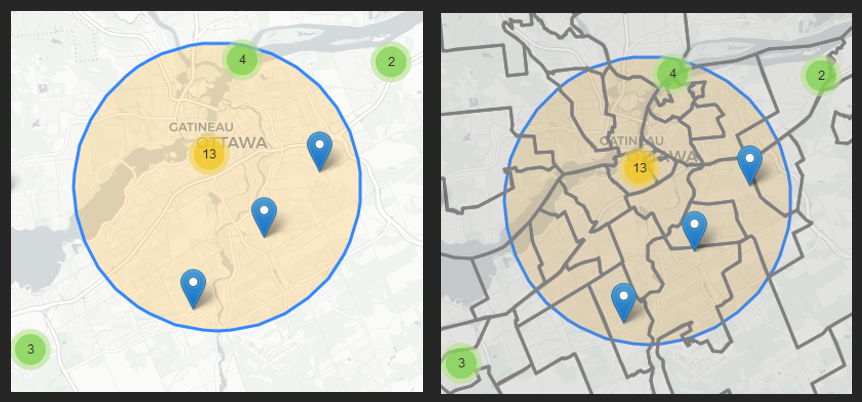

Statistics Canada defines urban regions as those having population densities in excess of 400 persons per square kilometer [6].  From this information each FSA is evaluated as urban or rural.  Rural FSA tend to be larger and have clusters of population while urban FSA tend to have a more uniform distributions of population.  Place theory [7] suggests rural populations are also willing to travel further to access higher value-added businesses.  Based on these considerations the following methodology is applied.  When urban FSA are within a ROI the proportion of population attributed to the ROI is based on the percentage of the FSA area within the ROI. For rural FSA the entire population is attributed to the ROI for FSA within or partially within the ROI. For median or average values associated with FSA the value for the ROI is determined by multiplying the FSA values by the population of the FSA associated with the ROI, summing all of the results, and dividing by the total population attributed to the ROI.

##### Brewery performance metrics
Detailed calls to the Foursquare API were used to determine performance metrics for each of the breweries.  This includes the following features;

|Feature|Description|
|:---|:---|
|fs_tip_count|The number of tips provided by Foursquare users|
|fs_price_tier|The average price tier reported by Foursquare users|
|fs_likes|The number of Foursquare users likes|
|fs_rating|The average rating of Foursquare users for the brewery|
|fs_total_ratings|The number of Foursquare users that provided a rating for the brewery|

The ‘years_operating’ feature calculated above when the list of Canadian breweries was gathered is also considered as a potential performance metric.  While breweries which have failed to thrive may have closed and are not included in the dataset their successful competitors can be identified by the number of years they have been operating.
